# Árbol de decisión para especies de flores
Utilizamos el dataset de la flor Iris para este ejercicio que ya habias visto en el curso de IA de la UNAD
https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape #150 muestras

(150, 5)

Vamos a revisar como se distribuyen los datos, esto logrado gracias al histograma

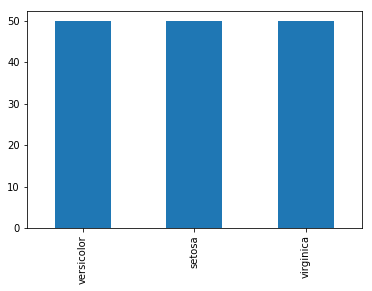

In [4]:
pd.Series(data.Species).value_counts().plot(kind='bar')

In [5]:
data.Species.unique()#tres datos: setosa, versicolor, virginica

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()#nombres de columna
predictoras = colnames[:4]#4 valores predictores
objetivo = colnames[4]#varaible que buscamos predecir. Es setosa, versicolor o virginica esos valores?
#guardan lista de nombres de columna

In [7]:
import numpy as np

In [8]:
#75% de los datos son para entrenamiento:
data["is_train"] = np.random.uniform(0,1, len(data))<0.75 #distribucion uniforme
data["is_train"]

0       True
1       True
2      False
3       True
4      False
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12     False
13      True
14      True
15      True
16     False
17     False
18      True
19     False
20     False
21     False
22      True
23      True
24      True
25      True
26      True
27      True
28     False
29      True
       ...  
120     True
121     True
122    False
123     True
124     True
125     True
126     True
127     True
128     True
129     True
130     True
131     True
132     True
133     True
134     True
135     True
136     True
137     True
138     True
139     True
140    False
141     True
142    False
143    False
144     True
145     True
146     True
147     True
148    False
149     True
Name: is_train, Length: 150, dtype: bool

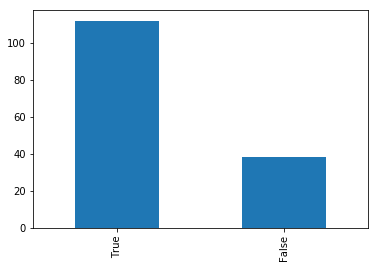

In [9]:
pd.Series(data.is_train).value_counts().plot(kind='bar')

40 flores son para "False" o validar y 110 son para entrenar

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]#datos marcados como true sera para entrenar
#falso seran para test

In [11]:
data.head() #columna is_train marca si es para entrenar o no

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,False


Ahora vamos a usar nuestro clasificador

In [12]:
from sklearn.tree import DecisionTreeClassifier #importo libreria de arbol clasificador

In [13]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
#clasifico con el metodo de entropia, algoritmo ID3
#minimo de elementos para hacer un split o division --> min_samples_split
    #esto es para decirle a los cuantos elementos un nodo se debe crear un subnodo
#random state --> ???
tree.fit(train[predictoras], train[objetivo])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

Otro parametro que no definimos es:
   *  _min_sample_leaf=_ que define el minimo total de ejemplos para crear una hoja

Utilizaremos el arbol para predecir lso valores del 25% restante

In [14]:
preds = tree.predict(test[predictoras])#variables para testear el arbol

In [15]:
pd.crosstab(test[objetivo], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,15,0,0
versicolor,0,11,1
virginica,0,0,11


* Al lado izquierdo tengo los valores actuales de la flor (el dataset original)
* Arriba se enlistan los que se predijeron con las varaibles _"predictions"_

**Resultados**

    * Todas las setosas fueorn bien clasificadas
    * Una que era versicolor se me clasifico mal como "virginica"
    * las 10 virginicas OK

## Visualización del árbol de decisión
Son necesarios 4 pasos para poder ver el arbol de clasificación:
1. Crear un archivo .dot

In [16]:
from sklearn.tree import export_graphviz

In [17]:
with open("resources/iris_dtree.dot", "w") as dotfile: #creo un archivo dot y lo abro con permisos para escribir
    export_graphviz(tree, out_file=dotfile, feature_names=predictoras)#funcion del grafico abro archivo dot 
    dotfile.close() #doy nombre a los parametros con los predictores
    #cierro archivo

Ya tenemos la informacion necesaria de las ramas, hojas, entropia, entre otros. Todos consignados en el archivo .dot
Ahora **para visualizar la informacion necesitamos otro modulo**

In [18]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'
from graphviz import Source #instalar libreria aparte - conda install python-graphviz

In [19]:
file = open("resources/iris_dtree.dot", "r")#abro solo en modo lectura
text = file.read()#leo archivo y guardo en variable
print(text)

digraph Tree {
node [shape=box] ;
0 [label="Petal.Length <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 38, 39]"] ;
1 [label="entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Petal.Width <= 1.65\nentropy = 1.0\nsamples = 77\nvalue = [0, 38, 39]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="Petal.Length <= 4.95\nentropy = 0.461\nsamples = 41\nvalue = [0, 37, 4]"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]"] ;
3 -> 4 ;
5 [label="entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]"] ;
3 -> 5 ;
6 [label="Petal.Length <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]"] ;
2 -> 6 ;
7 [label="entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]"] ;
6 -> 7 ;
8 [label="entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]"] ;
6 -> 8 ;
}


En esta web: http://www.webgraphviz.com/
* Puedes pegar el codigo anterior y ver el diagramita muy facil

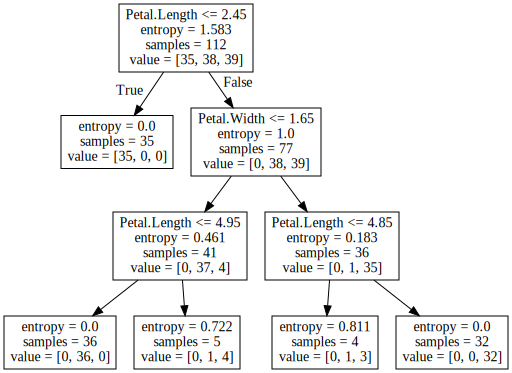

In [20]:
Source(text)

## Cross Validation para la poda

Para que los datos no solo se ajusten a mi Dataset, si no que me den una "generalizacion" para aplicar a nuevos datos y siga funcionando correctamente

In [21]:
X = data[predictoras]
Y = data[objetivo]

In [23]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [31]:
from sklearn.model_selection import KFold

In [33]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)#grupos de 15 flores para validar (150/10 = 15)

In [34]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(tree,X,Y,scoring="accuracy", cv = cv, n_jobs=1)
scores#una puntuacion muy alta

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [38]:
np.mean(scores)

0.9333333333333333

El siguiente resultado nos indica que el arbol con profundidad 3 es el mas exacto u optimo

In [40]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree,X,Y,scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [42]:
predictoras #nombres de lo que vemos arribita asi:
# [0.         0.         0.66869158 0.33130842]
#   [0.         0.         0.66620285 0.33379715]
# ...etc

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']